In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_json("https://data.elexon.co.uk/bmrs/api/v1/generation/outturn/summary?startTime=2023-10-18&endTime=2024-10-18&includeNegativeGeneration=true&format=json")

In [16]:
df.head()

,startTime,settlementPeriod,data
0,2023-10-18T00:00:00Z,3,"[{'fuelType': 'BIOMASS', 'generation': 1944}, ..."
1,2023-10-19T00:00:00Z,3,"[{'fuelType': 'BIOMASS', 'generation': 1560}, ..."
2,2023-10-20T00:00:00Z,3,"[{'fuelType': 'BIOMASS', 'generation': 1962}, ..."
3,2023-10-21T00:00:00Z,3,"[{'fuelType': 'BIOMASS', 'generation': 1968}, ..."
4,2023-10-22T00:00:00Z,3,"[{'fuelType': 'BIOMASS', 'generation': 2373}, ..."


In [20]:
df["data"][1]

[{'fuelType': 'BIOMASS', 'generation': 1560},
 {'fuelType': 'CCGT', 'generation': 8094},
 {'fuelType': 'COAL', 'generation': 380},
 {'fuelType': 'INTELEC', 'generation': 686},
 {'fuelType': 'INTEW', 'generation': -493},
 {'fuelType': 'INTFR', 'generation': 519},
 {'fuelType': 'INTIFA2', 'generation': 505},
 {'fuelType': 'INTIRL', 'generation': -413},
 {'fuelType': 'INTNED', 'generation': -386},
 {'fuelType': 'INTNEM', 'generation': 324},
 {'fuelType': 'INTNSL', 'generation': 0},
 {'fuelType': 'NPSHYD', 'generation': 525},
 {'fuelType': 'NUCLEAR', 'generation': 4061},
 {'fuelType': 'OCGT', 'generation': 14},
 {'fuelType': 'OIL', 'generation': 0},
 {'fuelType': 'OTHER', 'generation': 384},
 {'fuelType': 'PS', 'generation': -248},
 {'fuelType': 'WIND', 'generation': 11806}]

In [67]:
pd.json_normalize(df["data"][365]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
fuelType,BIOMASS,CCGT,COAL,INTELEC,INTEW,INTFR,INTGRNL,INTIFA2,INTIRL,INTNED,INTNEM,INTNSL,INTVKL,NPSHYD,NUCLEAR,OCGT,OIL,OTHER,PS,WIND
generation,2917,10530,0,0,-373,952,0,-2,-367,847,866,0,1126,399,4100,3,0,299,28,5859


In [110]:
row = pd.json_normalize(df["data"][1]).T
row.reset_index(inplace=True)
row.pop("index")
row.columns = row.iloc[0]
row.drop(0, inplace=True)
row.reset_index()
row

,BIOMASS,CCGT,COAL,INTELEC,INTEW,INTFR,INTIFA2,INTIRL,INTNED,INTNEM,INTNSL,NPSHYD,NUCLEAR,OCGT,OIL,OTHER,PS,WIND
1,1560,8094,380,686,-493,519,505,-413,-386,324,0,525,4061,14,0,384,-248,11806


In [107]:
columns =  pd.json_normalize(df["data"][365]).T.iloc[0].values
new_df = pd.DataFrame(columns=columns)
new_df


,BIOMASS,CCGT,COAL,INTELEC,INTEW,INTFR,INTGRNL,INTIFA2,INTIRL,INTNED,INTNEM,INTNSL,INTVKL,NPSHYD,NUCLEAR,OCGT,OIL,OTHER,PS,WIND


In [114]:
for i in range(len(df)):
    row = pd.json_normalize(df["data"][i]).T
    row.reset_index(inplace=True)
    row.pop("index")
    row.columns = row.iloc[0]
    row.drop(0, inplace=True)
    new_df.loc[len(new_df)] = row.iloc[0]
new_df

,BIOMASS,CCGT,COAL,INTELEC,INTEW,INTFR,INTGRNL,INTIFA2,INTIRL,INTNED,INTNEM,INTNSL,INTVKL,NPSHYD,NUCLEAR,OCGT,OIL,OTHER,PS,WIND
0,1560,8094,380,686,-493,519,NaN,505,-413,-386,324,0,NaN,525,4061,14,0,384,-248,11806
1,1944,3758,120,484,-259,458,NaN,396,-210,-28,120,0,NaN,547,4239,40,0,335,-162,15336
2,1560,8094,380,686,-493,519,NaN,505,-413,-386,324,0,NaN,525,4061,14,0,384,-248,11806
3,1962,5487,146,778,-345,674,NaN,712,-303,-224,462,0,NaN,489,3969,4,0,276,-154,13025
4,1968,5828,432,965,-490,891,NaN,965,-424,727,750,0,NaN,586,3951,4,0,290,-25,8965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2197,10431,0,0,-294,860,0,-2,-365,681,936,1220,1001,332,3709,71,0,388,-153,5773
363,2919,15617,0,0,-439,990,0,-2,-312,687,892,229,1071,381,3876,113,0,550,85,3470
364,2671,9023,0,0,-39,977,0,-2,-158,479,820,0,447,270,3899,21,0,388,-145,10962
365,2436,9332,0,0,-513,953,0,-2,-408,683,787,0,1024,302,3995,9,0,318,-31,10633


In [119]:
new_df.fillna(0, inplace=True)
new_df.tail()

,BIOMASS,CCGT,COAL,INTELEC,INTEW,INTFR,INTGRNL,INTIFA2,INTIRL,INTNED,INTNEM,INTNSL,INTVKL,NPSHYD,NUCLEAR,OCGT,OIL,OTHER,PS,WIND
362,2197,10431,0,0,-294,860,0,-2,-365,681,936,1220,1001,332,3709,71,0,388,-153,5773
363,2919,15617,0,0,-439,990,0,-2,-312,687,892,229,1071,381,3876,113,0,550,85,3470
364,2671,9023,0,0,-39,977,0,-2,-158,479,820,0,447,270,3899,21,0,388,-145,10962
365,2436,9332,0,0,-513,953,0,-2,-408,683,787,0,1024,302,3995,9,0,318,-31,10633
366,2917,10530,0,0,-373,952,0,-2,-367,847,866,0,1126,399,4100,3,0,299,28,5859


In [145]:
columns = new_df.columns
inters = columns[3:13]

new_df[inters]

,BIOMASS,CCGT,COAL,INTELEC,INTEW,INTFR,INTGRNL,INTIFA2,INTIRL,INTNED,INTNEM,INTNSL,INTVKL,NPSHYD,NUCLEAR,OCGT,OIL,OTHER,PS,WIND
0,1560,8094,380,686,-493,519,0,505,-413,-386,324,0,0,525,4061,14,0,384,-248,11806
1,1944,3758,120,484,-259,458,0,396,-210,-28,120,0,0,547,4239,40,0,335,-162,15336
2,1560,8094,380,686,-493,519,0,505,-413,-386,324,0,0,525,4061,14,0,384,-248,11806
3,1962,5487,146,778,-345,674,0,712,-303,-224,462,0,0,489,3969,4,0,276,-154,13025
4,1968,5828,432,965,-490,891,0,965,-424,727,750,0,0,586,3951,4,0,290,-25,8965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2197,10431,0,0,-294,860,0,-2,-365,681,936,1220,1001,332,3709,71,0,388,-153,5773
363,2919,15617,0,0,-439,990,0,-2,-312,687,892,229,1071,381,3876,113,0,550,85,3470
364,2671,9023,0,0,-39,977,0,-2,-158,479,820,0,447,270,3899,21,0,388,-145,10962
365,2436,9332,0,0,-513,953,0,-2,-408,683,787,0,1024,302,3995,9,0,318,-31,10633


In [158]:
gen_summed = new_df[columns].sum().values


array([775863, 2915075, 112428, 258993, -109133, 400655, -19, 172076,
       -103484, 73029, 177156, 363348, 114488, 150806, 1623709, 6111, 4,
       132470, -26539, 2815919], dtype=object)

<BarContainer object of 20 artists>

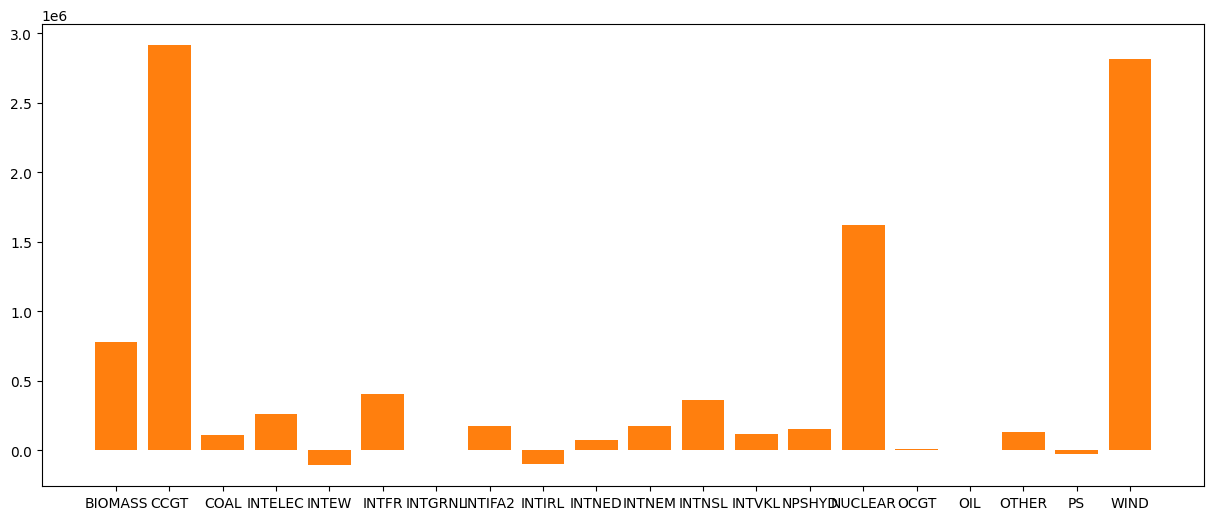

In [163]:
gen_summed = new_df[columns].sum().values


fig, ax = plt.subplots(figsize=(15,6))

ax.bar(
    x = columns,
    height = gen_summed,
)

ax.bar(
    x = columns,
    height = gen_summed,
)